# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

In [3]:
cities

['cidreira',
 'bairiki',
 'leningradskiy',
 'puerto ayora',
 'rikitea',
 'yellowknife',
 'butaritari',
 'nizhnyaya tavda',
 'kiama',
 'tuatapere',
 'taolanaro',
 'belushya guba',
 'malakal',
 'longyearbyen',
 'omsukchan',
 'mataura',
 'punta arenas',
 'naze',
 'illoqqortoormiut',
 'chokurdakh',
 'constitucion',
 'mayo',
 'hilo',
 'sena madureira',
 'loiza',
 'jamestown',
 'ribeira grande',
 'bluff',
 'narsaq',
 'east london',
 'kloulklubed',
 'ushuaia',
 'zharkent',
 'andenes',
 'homestead',
 'sur',
 'port elizabeth',
 'yongan',
 'port blair',
 'deputatskiy',
 'huaicheng',
 'coquimbo',
 'chandvad',
 'timbakion',
 'port-gentil',
 'half moon bay',
 'port alfred',
 'pevek',
 'saint-philippe',
 'tuktoyaktuk',
 'attawapiskat',
 'gat',
 'mlalo',
 'chicago',
 'dikson',
 'hithadhoo',
 'mutuipe',
 'isangel',
 'maniitsoq',
 'hermanus',
 'tombouctou',
 'nyurba',
 'ocos',
 'pagudpud',
 'kapaa',
 'vaitupu',
 'saskylakh',
 'flinders',
 'upernavik',
 'airai',
 'bredasdorp',
 'tiksi',
 'busselton',
 '

In [4]:
cities_df=pd.DataFrame({"City": cities})
cities_df.head()

,City
0,cidreira
1,bairiki
2,leningradskiy
3,puerto ayora
4,rikitea


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url= f"{url}appid={api_key}&units=imperial&q="
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
# print(query_url)
process_record = 1

In [6]:
print("Beginning Data Retrieval")
print("---------------------------")

for city in cities:
    try:
        response = requests.get(f"{query_url}+{city}").json()
        city_name.append(response["name"])
        city_name2 = response["name"]
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        print(f"Processing Record {process_record} | {city_name2}")
        
        process_record=process_record+1
        
    except: 
        print("City not found...skipping")
        print("----------")
    continue



Beginning Data Retrieval
---------------------------
Processing Record 1 | Cidreira
City not found...skipping
----------
Processing Record 2 | Leningradskiy
Processing Record 3 | Puerto Ayora
Processing Record 4 | Rikitea
Processing Record 5 | Yellowknife
Processing Record 6 | Butaritari
Processing Record 7 | Nizhnyaya Tavda
Processing Record 8 | Kiama
Processing Record 9 | Tuatapere
City not found...skipping
----------
City not found...skipping
----------
Processing Record 10 | Malakal
Processing Record 11 | Longyearbyen
Processing Record 12 | Omsukchan
City not found...skipping
----------
Processing Record 13 | Punta Arenas
Processing Record 14 | Naze
City not found...skipping
----------
Processing Record 15 | Chokurdakh
Processing Record 16 | Constitucion
Processing Record 17 | Mayo
Processing Record 18 | Hilo
Processing Record 19 | Sena Madureira
Processing Record 20 | Loiza
Processing Record 21 | Jamestown
Processing Record 22 | Ribeira Grande
Processing Record 23 | Bluff
Processi

Processing Record 212 | Bishop Auckland
Processing Record 213 | Lebedinyy
Processing Record 214 | Bethel
Processing Record 215 | Mehamn
Processing Record 216 | Jhanjharpur
Processing Record 217 | Camana
Processing Record 218 | Putina
Processing Record 219 | Cockburn Town
Processing Record 220 | Sheffield
Processing Record 221 | Sabang
Processing Record 222 | Rondonopolis
City not found...skipping
----------
Processing Record 223 | Trofors
Processing Record 224 | Kalemie
Processing Record 225 | Zhigansk
Processing Record 226 | Albufeira
Processing Record 227 | Carnarvon
City not found...skipping
----------
Processing Record 228 | Norman Wells
Processing Record 229 | Bara
City not found...skipping
----------
Processing Record 230 | Nouadhibou
Processing Record 231 | Rafaela
Processing Record 232 | Hualmay
Processing Record 233 | Bubaque
Processing Record 234 | Saint George
Processing Record 235 | Mahajanga
Processing Record 236 | Bahia Blanca
Processing Record 237 | Kahului
Processing Re

Processing Record 426 | Ugoofaaru
Processing Record 427 | Nikolayevsk-na-Amure
Processing Record 428 | Al
Processing Record 429 | Vanersborg
Processing Record 430 | Ozernovskiy
Processing Record 431 | Chumikan
Processing Record 432 | Taltal
Processing Record 433 | Urucara
City not found...skipping
----------
Processing Record 434 | Rocha
Processing Record 435 | Turukhansk
Processing Record 436 | Port Macquarie
Processing Record 437 | Emba
City not found...skipping
----------
Processing Record 438 | Souillac
Processing Record 439 | Sterling
Processing Record 440 | Muros
Processing Record 441 | Praia da Vitoria
City not found...skipping
----------
Processing Record 442 | Ust-Nera
City not found...skipping
----------
Processing Record 443 | Yar-Sale
City not found...skipping
----------
Processing Record 444 | Kirkwall
Processing Record 445 | Ondangwa
Processing Record 446 | Torbay
Processing Record 447 | Goderich
Processing Record 448 | Minas
Processing Record 449 | Aswan
Processing Recor

In [7]:
print(cloudiness[0])

98


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_data = pd.DataFrame({"City": city_name,
               "Cloudiness": cloudiness,
               "Country": country,
               "Date": date,
               "Humidity": humidity,
               "Lat": lat,
               "Lng": lng,
               "Max Temp": max_temp,
               "Wind Speed": wind_speed,
               })
weather_data.count()

City          519
Cloudiness    519
Country       519
Date          519
Humidity      519
Lat           519
Lng           519
Max Temp      519
Wind Speed    519
dtype: int64

In [11]:
weather_data.to_csv('output_data/weather_data.csv')
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cidreira,98,BR,1572820692,71,-30.18,-50.21,67.95,5.21
1,Leningradskiy,32,RU,1572820752,77,69.38,178.42,17.60,3.44
2,Puerto Ayora,20,EC,1572820689,57,-0.74,-90.35,78.80,16.11
3,Rikitea,82,PF,1572820675,78,-23.12,-134.97,74.26,9.91
4,Yellowknife,40,CA,1572820682,66,62.46,-114.35,12.99,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

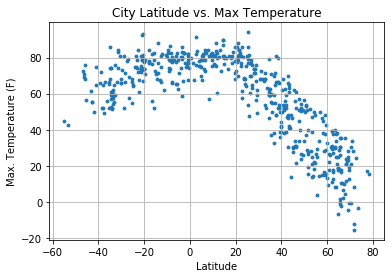

In [14]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=8)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (F)")

plt.grid(True)

plt.savefig("Max_Temp_VS_Latitude.png")

plt.show()

#### Latitude vs. Humidity Plot

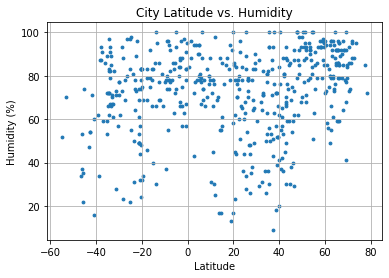

In [15]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=8)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.grid(True)

plt.savefig("Humidity_VS_Latitude.png")

plt.show()

#### Latitude vs. Cloudiness Plot

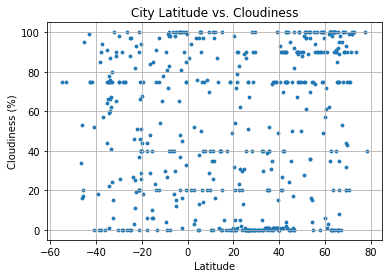

In [16]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=8)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.grid(True)

plt.savefig("Cloudiness_VS_Latitude.png")

plt.show()

#### Latitude vs. Wind Speed Plot

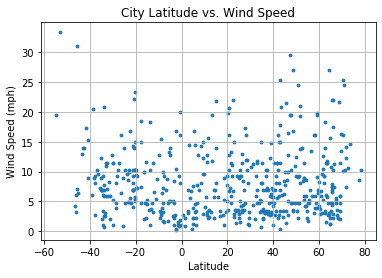

In [17]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=8)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.grid(True)

plt.savefig("Wind_Speed_VS_Latitude.png")

plt.show()

3 observable trends:
1) One noticable trend is that cities south of the equator and closer to the equator had a higher max temperature than north of the equator
2) The sample data revieled that there are more cities with high humidity regardless of location
3) There did not seem to be a noticeable trend between cloudiness and distance from the equator